In [15]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Read the data from csv file
emp=pd.read_csv("Unemployment_in_India[1].csv")

In [3]:
#Displaying the first 5 rows of the data
emp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
#Displaying the bottom 5 rows of the data
emp.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
emp.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
#Renaming the columns for better readabilty
emp.columns=["States","Date","Frequency","Estimated Unemployment Rate(%)","Estimated Employed","Estimated Labour Participation Rate(%)","Region"]


In [8]:
#Exclude non-numeric columns for correlation calculation
numeric_columns=["Estimated Unemployment Rate(%)","Estimated Employed","Estimated Labour Participation Rate(%)"]
numeric_data=emp[numeric_columns]

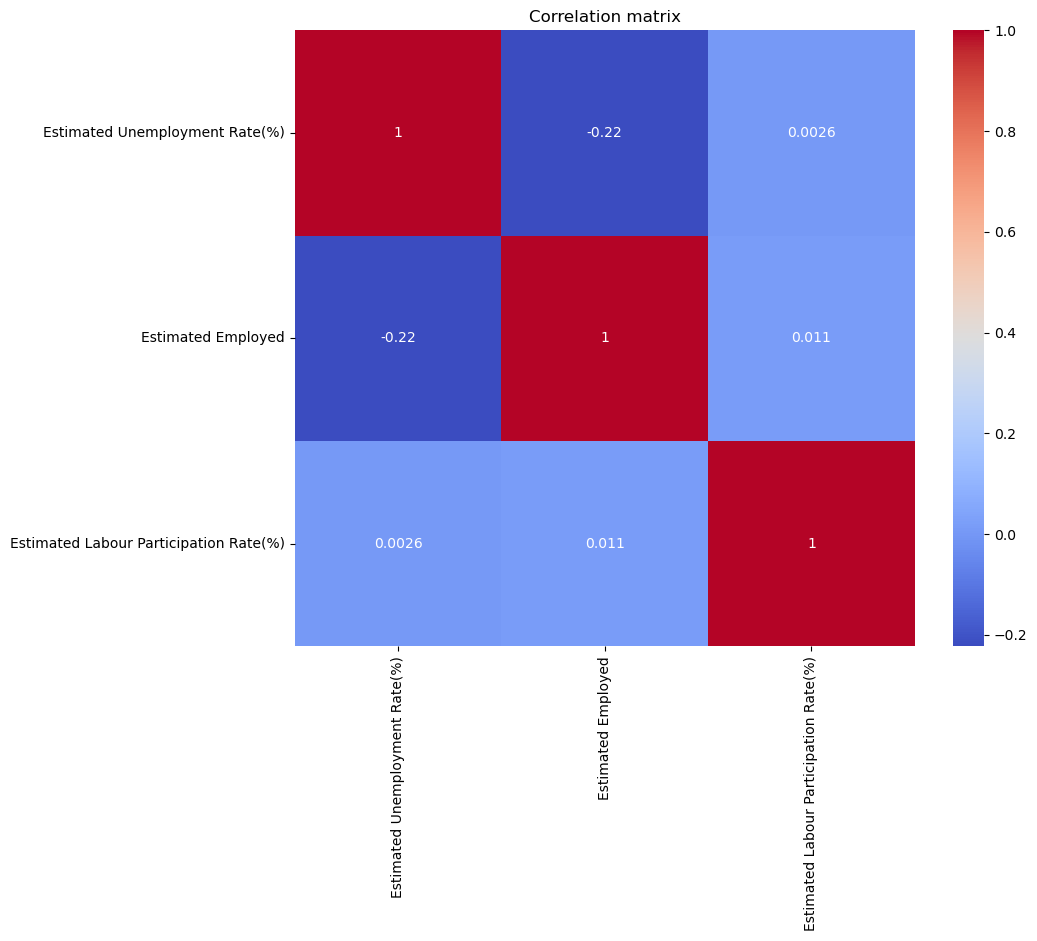

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


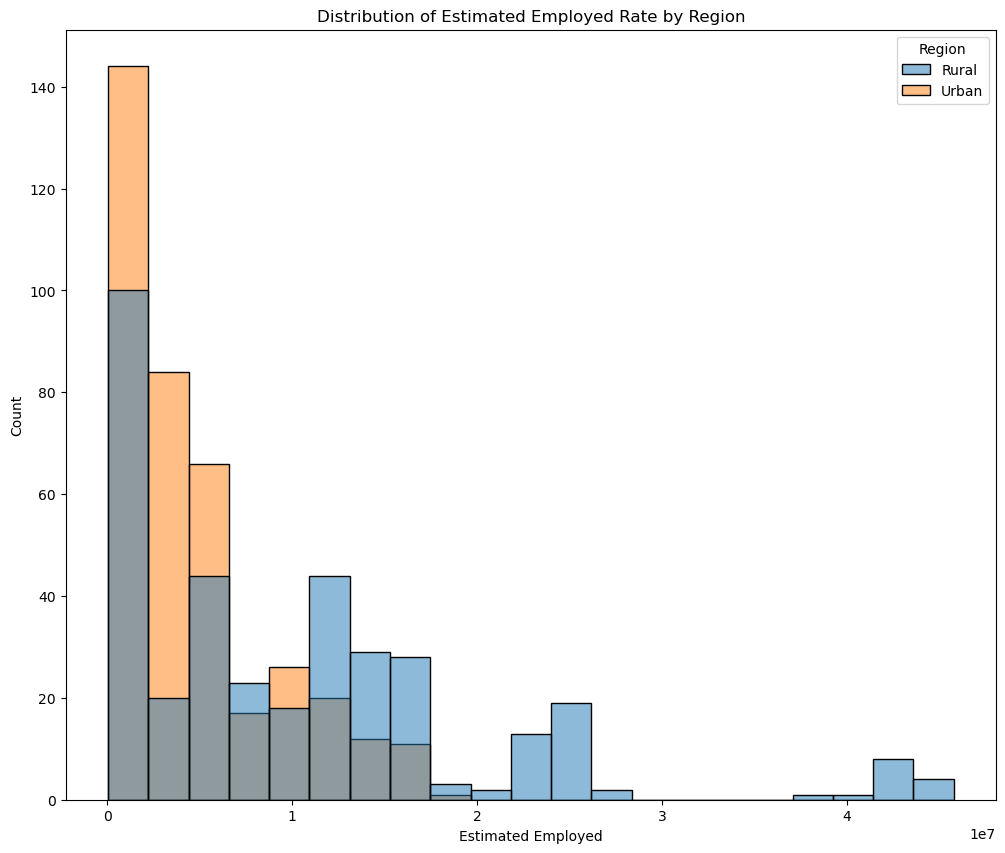

In [10]:
#Histogram of Estimated Employed by Region
plt.figure(figsize=(12,10))
plt.title("Distribution of Estimated Employed Rate by Region")
sns.histplot(x="Estimated Employed",hue="Region",data=emp)
plt.xlabel("Estimated Employed")
plt.ylabel("Count")
plt.show()

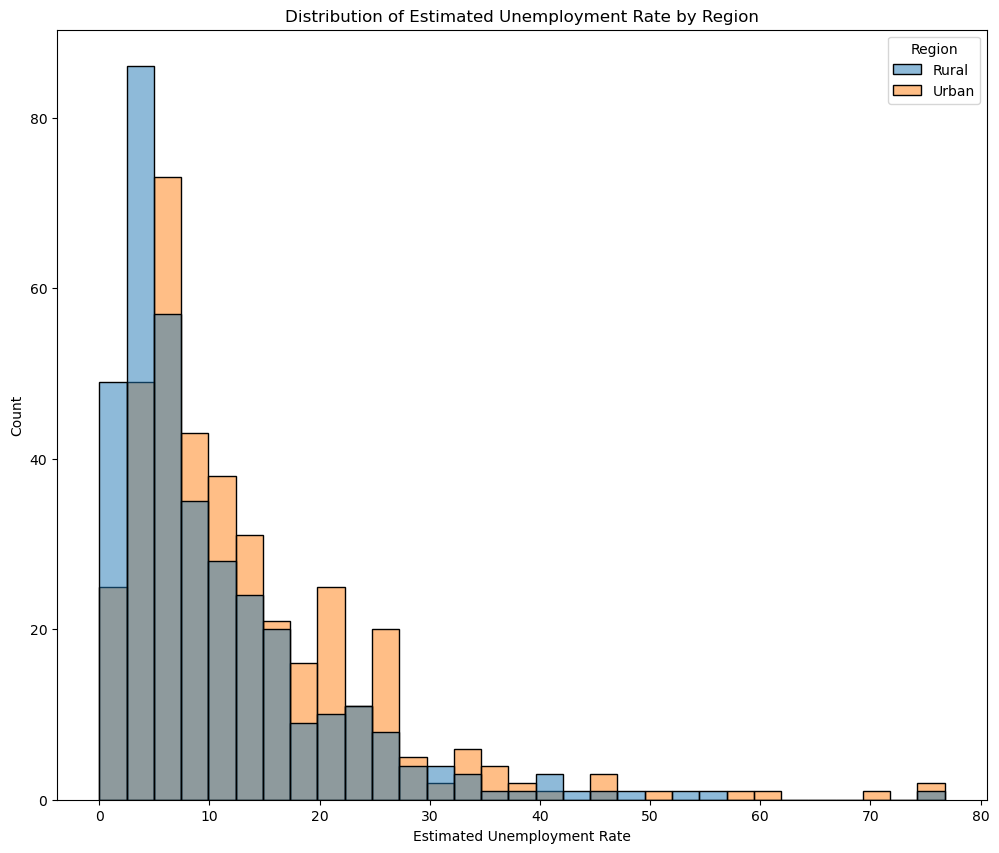

In [11]:
#Histogram of Estimated Unemployment Rate by Region
plt.figure(figsize=(12,10))
plt.title("Distribution of Estimated Unemployment Rate by Region")
sns.histplot(x="Estimated Unemployment Rate(%)",hue="Region",data=emp)
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()

In [18]:
aggregated_data=emp.groupby(["Region","States"],as_index=False)["Estimated Unemployment Rate(%)"].mean()
fig = px.sunburst(aggregated_data, path=["Region", "States"], values="Estimated Unemployment Rate(%)",
                  color_continuous_scale="RdYlGn", title="Interactive Pie Chart of Unemployment Rate in India")
fig.show()